In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('Sales Transaction v.4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [3]:
df.shape


(536350, 8)

In [4]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.7+ MB


In [7]:
df.dropna(inplace=True)
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [8]:
df.duplicated().sum()

5200

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df['Total'] = df['Quantity']*df['Price']

### Permasalahan

1. bagaimana tren penjualan setiap bulan?
2. apa produk yang menghsilkan banyak keuntungan?
3. produk apa yang paling populer?
4. kebanyakan customer dari negara mana?

# 1. tren penjualan setiap bulan

In [11]:
df['Month'] = df['Date'].dt.to_period('M')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total,Month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,2019-12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,2019-12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,2019-12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,2019-12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,2019-12


In [12]:
monthly_trend = df.groupby(by = 'Month', as_index = False)['Total'].sum()
monthly_trend

,Month,Total
0,2018-12,4217281.53
1,2019-01,3638948.12
2,2019-02,3292324.69
3,2019-03,4340035.60
4,2019-04,3406002.17
5,2019-05,4521986.96
6,2019-06,4404297.96
7,2019-07,4501972.15
8,2019-08,4609655.77
9,2019-09,6529427.35


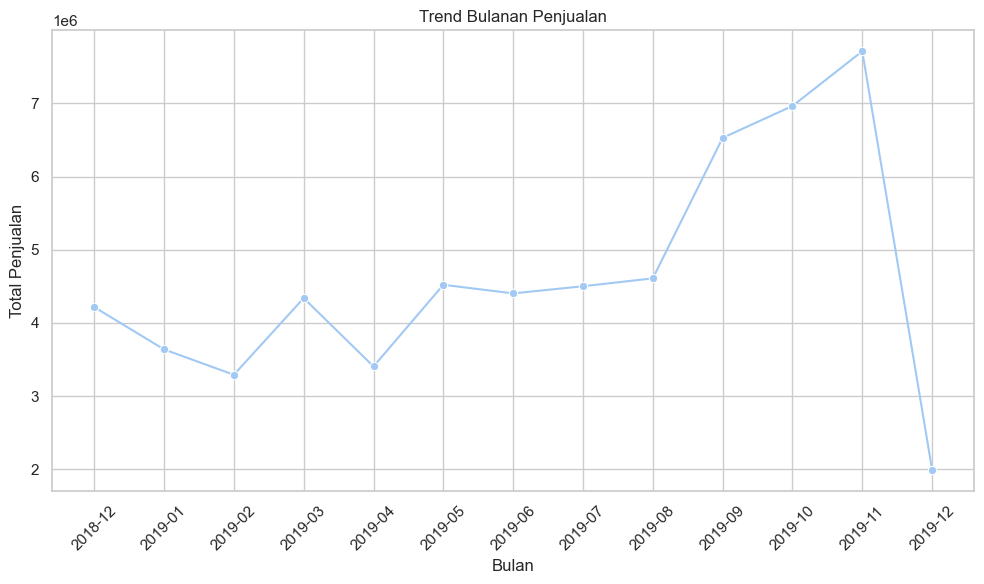

In [13]:
# Mengonversi kolom 'Month' ke string
monthly_trend['Month'] = monthly_trend['Month'].astype(str)
    
# Tentukan gaya dan warna plot
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Buat grafik garis menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total', data=monthly_trend, marker='o')

# Atur label dan judul
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.title('Trend Bulanan Penjualan')

# Format tanggal di sumbu x (opsional)
plt.xticks(rotation=45)

# Tampilkan plot
plt.tight_layout()
plt.show()


kita cari tahu mengapa pada bulan 12 tahun 2019 mengalami penurunan yang sangat besar


In [14]:
date = df[df['Date'] >= '2019-12-01']

In [15]:
print(date['Date'].min())
print(date['Date'].max())

2019-12-01 00:00:00
2019-12-09 00:00:00


ternyata untuk bulan 12 data yang diperoleh hanya dari tanggal 1 sampai tanggal 9, maka coba kita hanya akan pilih data sebelum bulan 12 tahun 2019

In [16]:
df2 = df[df['Date'] < '2019-12-01']

In [17]:
df2_monthly = df2.groupby(by= 'Month', as_index = False)['Total'].sum()
df2_monthly

,Month,Total
0,2018-12,4217281.53
1,2019-01,3638948.12
2,2019-02,3292324.69
3,2019-03,4340035.60
4,2019-04,3406002.17
5,2019-05,4521986.96
6,2019-06,4404297.96
7,2019-07,4501972.15
8,2019-08,4609655.77
9,2019-09,6529427.35


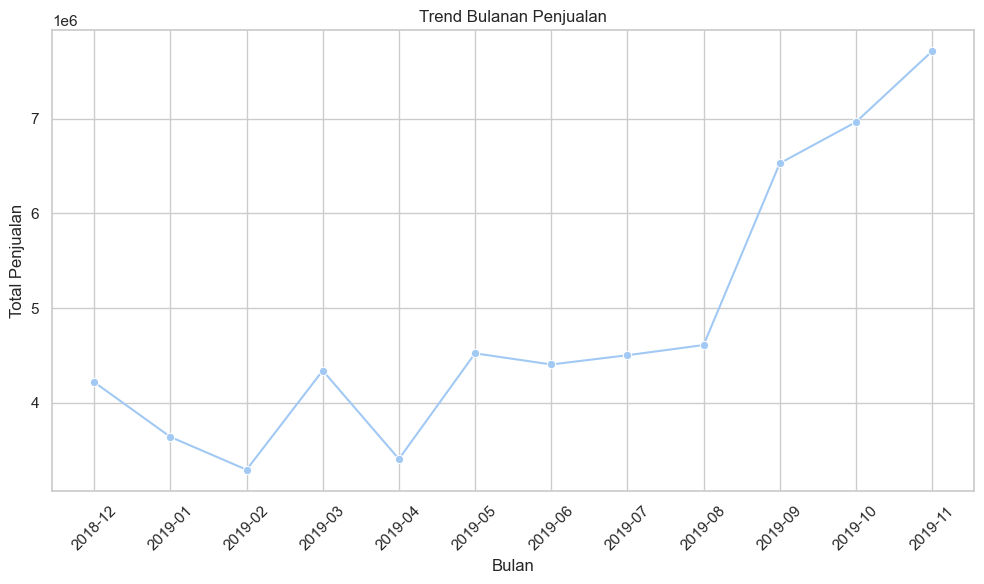

In [18]:
# Mengonversi kolom 'Month' ke string
df2_monthly['Month'] = df2_monthly['Month'].astype(str)
    
# Tentukan gaya dan warna plot


# Buat grafik garis menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total', data=df2_monthly, marker='o')

# Atur label dan judul
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.title('Trend Bulanan Penjualan')

# Format tanggal di sumbu x (opsional)
plt.xticks(rotation=45)

# Tampilkan plot
plt.tight_layout()
plt.show()

jadi, dimulai dari bulan 8 penjualan naik signifikan sampai pada bulan 11

# 2. produk yang menghasilkan banyak keuntungan

In [19]:
qtytotal = df.groupby(by= 'ProductName', as_index= False)['Total'].sum().sort_values('Total', ascending = False).head(10)
qtytotal

,ProductName,Total
2489,Popcorn Holder,583075.23
3684,World War 2 Gliders Asstd Designs,556157.63
2210,Paper Craft Little Birdie,501359.05
828,Cream Hanging Heart T-Light Holder,451163.73
204,Assorted Colour Bird Ornament,419557.68
2164,Pack Of 72 Retrospot Cake Cases,388180.66
2549,Rabbit Night Light,327293.83
1679,Jumbo Bag Red Retrospot,289853.95
2661,Regency Cakestand 3 Tier,288752.33
1945,Mini Paint Set Vintage,284870.92


In [20]:
rugi = df.groupby(by= 'ProductName', as_index= False)['Total'].sum().sort_values('Total').head(10)
rugi

,ProductName,Total
232,Assorted Tutti Frutti Round Box,-286.56
3582,White Cherry Lights,-137.36
3653,Wooden Box Advent Calendar,-119.90
440,Blue Padded Soft Mobile,-87.66
834,Cream Sweetheart Magazine Rack,-78.76
2316,Pink Cherry Lights,-68.68
3482,Vintage Gold Tinsel Reel,-64.08
2413,Pink Poodle Hanging Decoration,-59.23
177,Antique Lily Fairy Lights,-45.96
2425,Pink Small Glass Cake Stand,-36.75


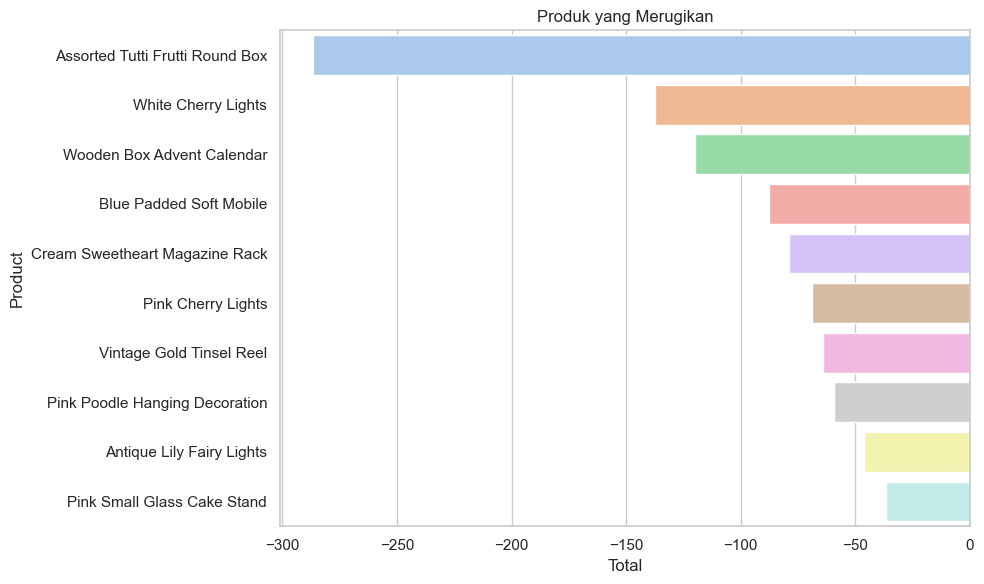

In [21]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Buat grafik garis menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='ProductName', data=rugi)

# Atur label dan judul
plt.xlabel('Total')
plt.ylabel('Product')
plt.title('Produk yang Merugikan')

# Tampilkan plot
plt.tight_layout()
plt.show()

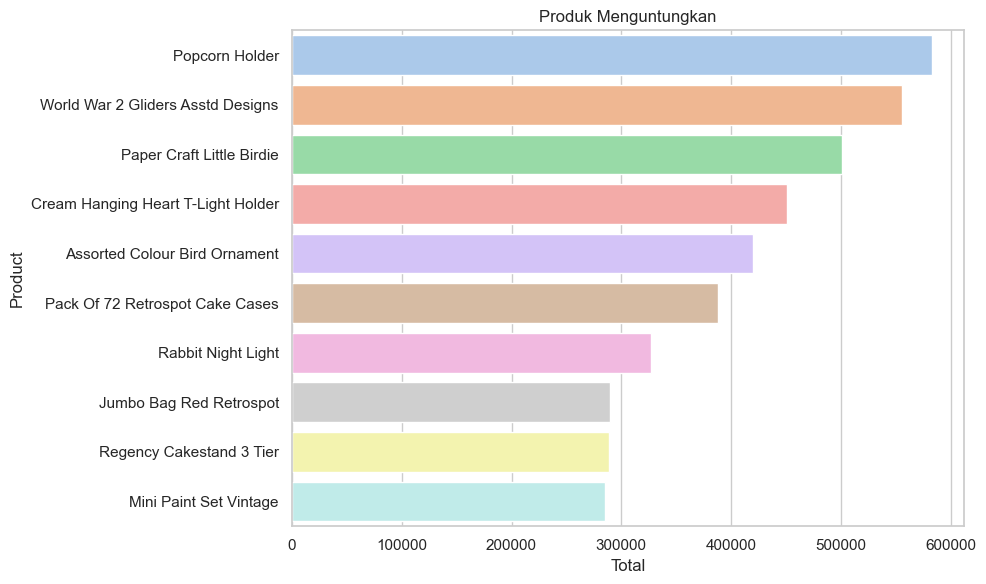

In [22]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Buat grafik garis menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='ProductName', data=qtytotal)

# Atur label dan judul
plt.xlabel('Total')
plt.ylabel('Product')
plt.title('Produk Menguntungkan')

# Tampilkan plot
plt.tight_layout()
plt.show()

# 3. Produk yang paling populer

In [23]:
popular = df.groupby(by = 'ProductName', as_index = False)['Quantity'].sum().sort_values('Quantity', ascending = False).head(10)
popular

,ProductName,Quantity
2489,Popcorn Holder,56431
3684,World War 2 Gliders Asstd Designs,53751
1679,Jumbo Bag Red Retrospot,47260
204,Assorted Colour Bird Ornament,36346
2164,Pack Of 72 Retrospot Cake Cases,36208
828,Cream Hanging Heart T-Light Holder,35359
2549,Rabbit Night Light,30634
1945,Mini Paint Set Vintage,26437
2131,Pack Of 12 London Tissues,26095
2162,Pack Of 60 Pink Paisley Cake Cases,24719


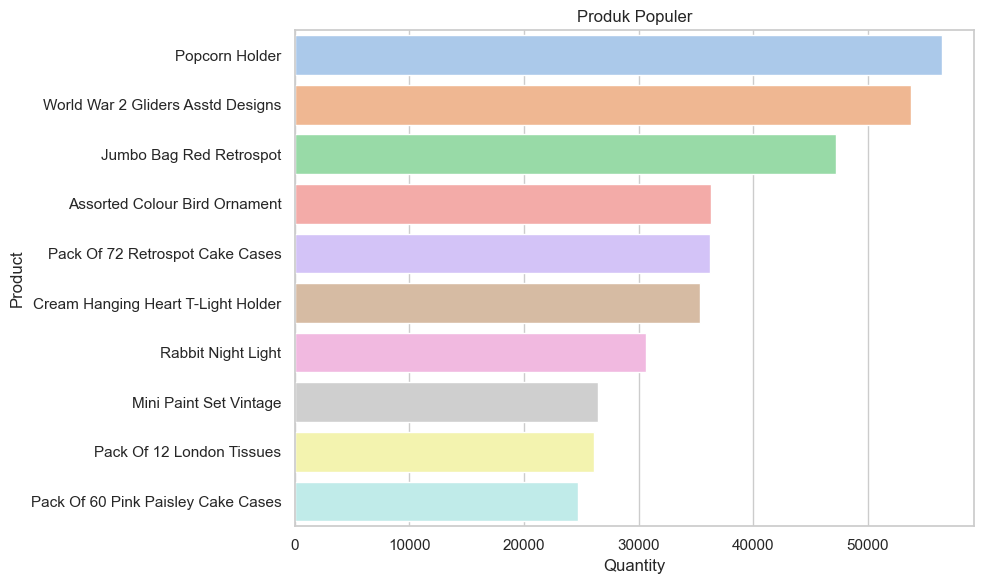

In [24]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Buat grafik garis menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductName', data=popular)

# Atur label dan judul
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.title('Produk Populer')

# Tampilkan plot
plt.tight_layout()
plt.show()

# 4. Negara paling menguntungkan

In [25]:
country = df.groupby(by = 'Country', as_index = False)['Total'].sum().sort_values('Total', ascending = False).head(10)
country

,Country,Total
36,United Kingdom,49855388.84
24,Netherlands,2147811.39
10,EIRE,1659053.51
14,Germany,1348561.75
13,France,1316144.75
0,Australia,988562.45
32,Sweden,396042.61
33,Switzerland,358146.32
20,Japan,283293.47
3,Belgium,271346.98


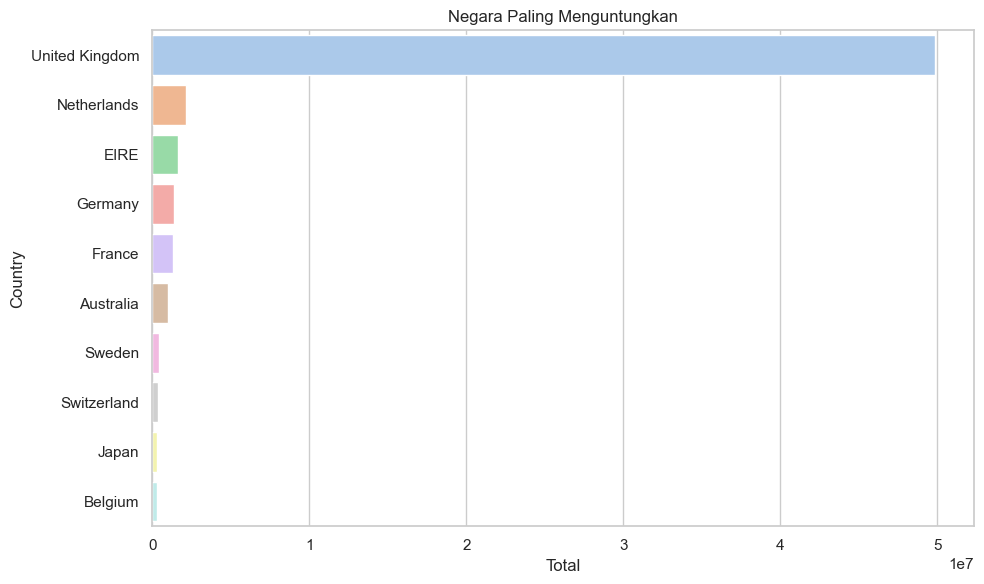

In [26]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Buat grafik garis menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Country', data=country)

# Atur label dan judul
plt.xlabel('Total')
plt.ylabel('Country')
plt.title('Negara Paling Menguntungkan')

# Tampilkan plot
plt.tight_layout()
plt.show()

# 5. Produk yang Paling banyak di Retur

In [27]:
retur = df[df['Quantity'] < 0]

In [28]:
prodretur = retur.groupby(by = 'ProductName', as_index = False)['Quantity'].sum().sort_values('Quantity').head(10)
prodretur

,ProductName,Quantity
1144,Paper Craft Little Birdie,-80995
990,Medium Ceramic Top Storage Jar,-74494
1409,Rotating Silver Angels T-Light Hldr,-9367
566,Fairy Cake Flannel Assorted Colour,-3150
414,Cream Hanging Heart T-Light Holder,-2578
685,Gin And Tonic Diet Metal Sign,-2030
801,Herb Marker Basil,-1527
592,Feltcraft Doll Molly,-1447
1694,Tea Time Party Bunting,-1424
1148,Paper Pocket Traveling Fan,-1385


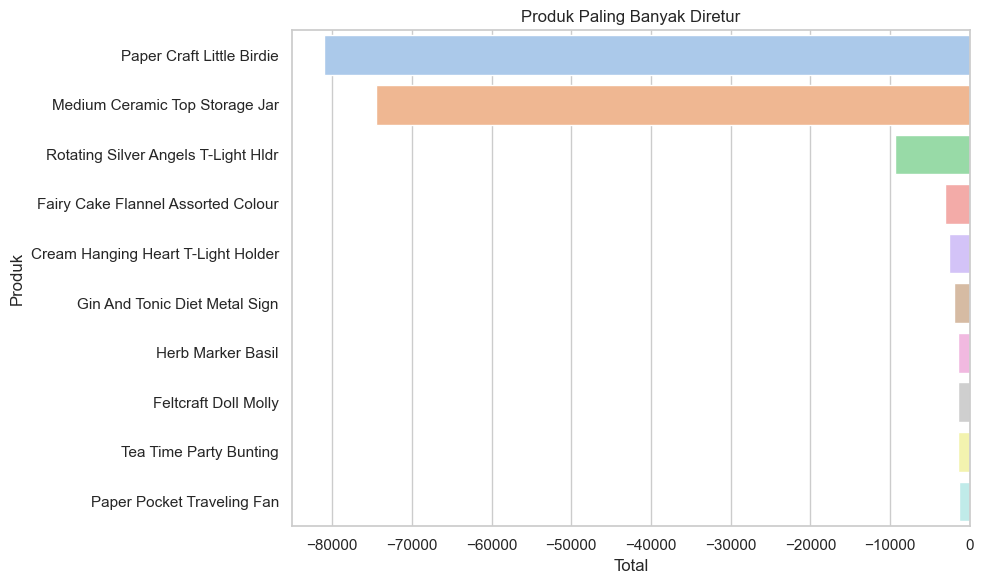

In [29]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Buat grafik garis menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductName', data=prodretur)

# Atur label dan judul
plt.xlabel('Total')
plt.ylabel('Produk')
plt.title('Produk Paling Banyak Diretur')

# Tampilkan plot
plt.tight_layout()
plt.show()

In [30]:
df_rfm = df2[df2['Quantity'] > 0]

In [31]:
df_rfm.head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total,Month
25361,579522,2019-11-30,84879,Assorted Colour Bird Ornament,6.04,8,14432.0,United Kingdom,48.32,2019-11
25362,579522,2019-11-30,82486,3 Drawer Antique White Wood Cabinet,6.04,4,14432.0,United Kingdom,24.16,2019-11
25363,579522,2019-11-30,82483,Wood 2 Drawer Cabinet White Finish,6.04,8,14432.0,United Kingdom,48.32,2019-11
25364,579522,2019-11-30,23493,Vintage Doily Travel Sewing Kit,6.04,10,14432.0,United Kingdom,60.40,2019-11
25365,579522,2019-11-30,23240,Set Of 4 Knick Knack Tins Doily,6.19,6,14432.0,United Kingdom,37.14,2019-11
25366,579522,2019-11-30,20724,Red Retrospot Charlotte Bag,6.19,10,14432.0,United Kingdom,61.90,2019-11
25367,579522,2019-11-30,22616,Pack Of 12 London Tissues,6.19,24,14432.0,United Kingdom,148.56,2019-11
25368,579522,2019-11-30,21985,Pack Of 12 Hearts Design Tissues,6.19,24,14432.0,United Kingdom,148.56,2019-11
25369,579522,2019-11-30,84029E,Red Woolly Hottie White Heart,6.19,4,14432.0,United Kingdom,24.76,2019-11
25370,579522,2019-11-30,22865,Hand Warmer Owl Design,7.24,12,14432.0,United Kingdom,86.88,2019-11


In [32]:
import datetime as dt
NOW = dt.datetime(2019,12,1)

In [33]:
rfmTable = df_rfm.groupby('CustomerNo', as_index = False).agg({'Date': lambda x: (NOW - x.max()).days, 'TransactionNo': lambda x: len(x),'Total': lambda x: x.sum()})
rfmTable['Date'] = rfmTable['Date'].astype(int)
rfmTable.rename(columns={'Date': 'recency', 
                         'TransactionNo': 'frequency',
                       'Total': 'monetary_value'}, inplace=True)

In [34]:
rfmTable.head()

,CustomerNo,recency,frequency,monetary_value
0,12004.0,219,56,1509.60
1,12006.0,210,1,24.76
2,12008.0,268,203,5689.57
3,12013.0,351,1,69.96
4,12024.0,168,5,149.52


In [35]:
rfmTable["rscore"] = pd.qcut(rfmTable["recency"], 5, labels = [5, 4 , 3, 2, 1])
rfmTable["fscore"]= pd.qcut(rfmTable["frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfmTable["mscore"] = pd.qcut(rfmTable['monetary_value'], 5, labels = [1, 2, 3, 4, 5])

In [36]:
rfmTable.head()

,CustomerNo,recency,frequency,monetary_value,rscore,fscore,mscore
0,12004.0,219,56,1509.60,1,3,2
1,12006.0,210,1,24.76,1,1,1
2,12008.0,268,203,5689.57,1,5,3
3,12013.0,351,1,69.96,1,1,1
4,12024.0,168,5,149.52,2,1,1


In [37]:
rfmTable['RFMScore'] = (rfmTable['rscore'].astype(str) + rfmTable['fscore'].astype(str) + rfmTable['mscore'].astype(str)) 

In [38]:
rfmTable.head()

,CustomerNo,recency,frequency,monetary_value,rscore,fscore,mscore,RFMScore
0,12004.0,219,56,1509.60,1,3,2,132
1,12006.0,210,1,24.76,1,1,1,111
2,12008.0,268,203,5689.57,1,5,3,153
3,12013.0,351,1,69.96,1,1,1,111
4,12024.0,168,5,149.52,2,1,1,211


In [39]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfmTable['Segment'] = rfmTable['rscore'].astype(str) + rfmTable['fscore'].astype(str)
rfmTable['Segment'] = rfmTable['Segment'].replace(seg_map, regex=True)

In [40]:
rfmTable.head()

,CustomerNo,recency,frequency,monetary_value,rscore,fscore,mscore,RFMScore,Segment
0,12004.0,219,56,1509.60,1,3,2,132,At Risk
1,12006.0,210,1,24.76,1,1,1,111,Hibernating
2,12008.0,268,203,5689.57,1,5,3,153,Can't Loose
3,12013.0,351,1,69.96,1,1,1,111,Hibernating
4,12024.0,168,5,149.52,2,1,1,211,Hibernating


In [47]:
segment = rfmTable['Segment'].value_counts()
segment

Hibernating            1079
Loyal Customers         819
Champions               642
At Risk                 611
Potential Loyalists     597
About to Sleep          361
Need Attention          213
Can't Loose             163
Promising               103
New Customers            83
Name: Segment, dtype: int64

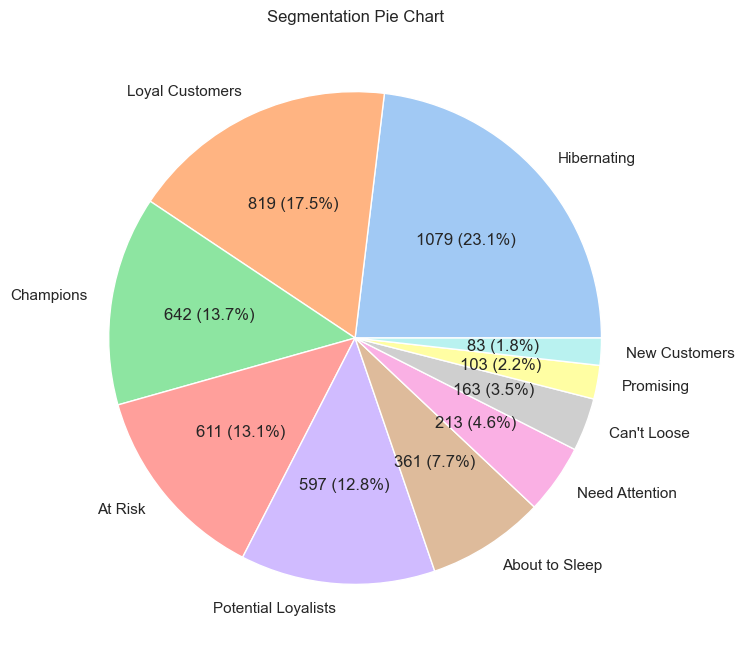

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(segment, labels=segment.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(segment) / 100, p))

# Menambahkan judul
plt.title('Segmentation Pie Chart')

# Menampilkan pie chart
plt.show()

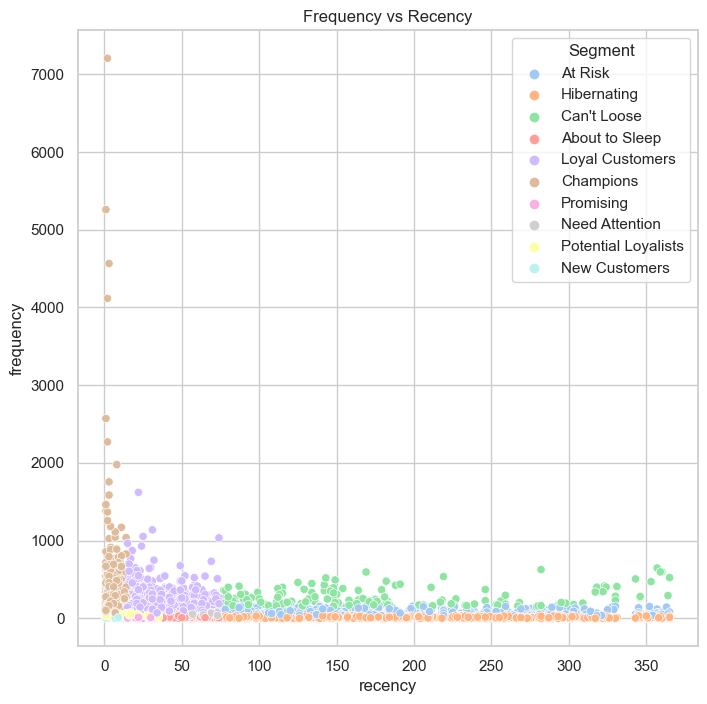

In [43]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data = rfmTable, x = 'recency', y = 'frequency', hue = 'Segment')

plt.title('Frequency vs Recency')

# Menampilkan pie chart
plt.show()

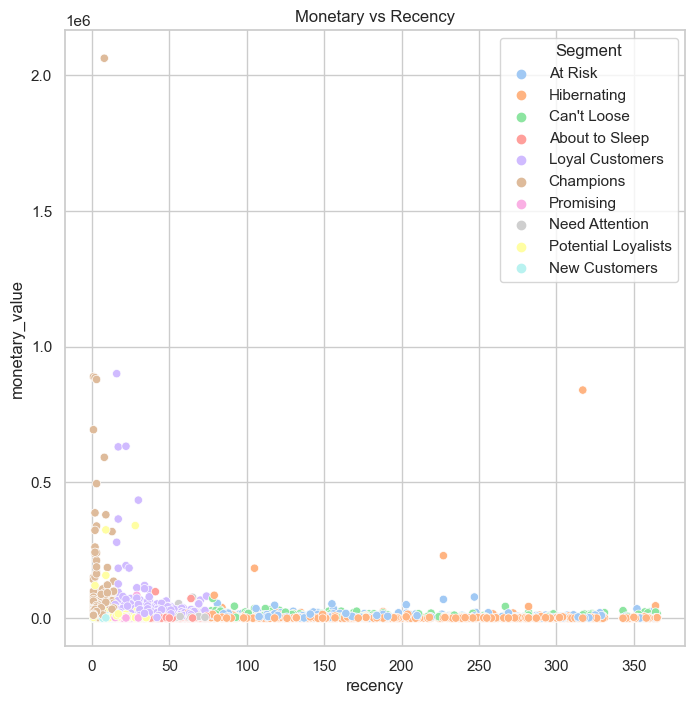

In [44]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data = rfmTable, y = 'monetary_value', x = 'recency', hue = 'Segment')

plt.title('Monetary vs Recency')

# Menampilkan pie chart
plt.show()

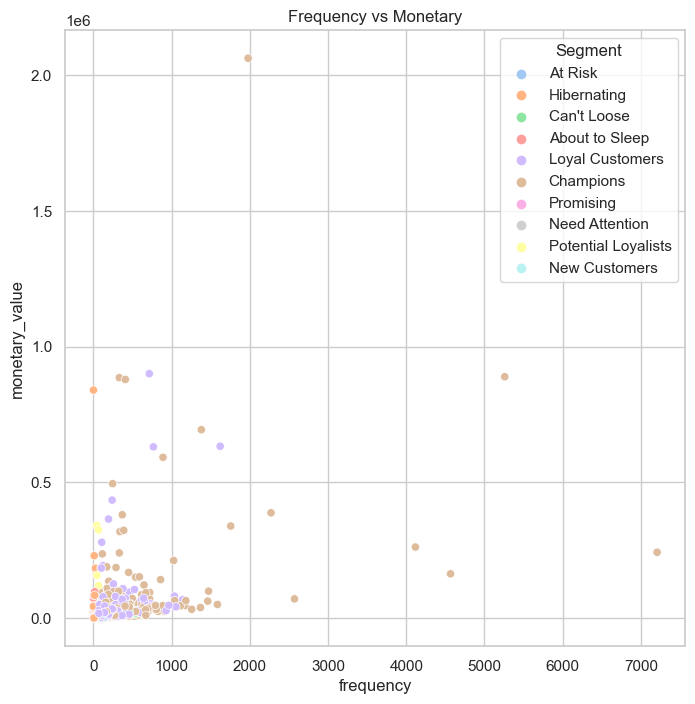

In [45]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data = rfmTable, y = 'monetary_value', x = 'frequency', hue = 'Segment')

plt.title('Frequency vs Monetary')

# Menampilkan pie chart
plt.show()

In [46]:
summary = rfmTable[['Segment', 'recency', 'frequency', 'monetary_value']].groupby('Segment').agg(['mean', 'min', 'max'])
summary

recency            frequency             \
                           mean min  max        mean  min   max   
Segment                                                           
About to Sleep        54.623269  36   76   16.537396    1    34   
At Risk              179.931260  77  365   70.613748   34   155   
Can't Loose          174.877301  77  365  268.447853  156   647   
Champions              6.906542   1   14  298.107477   70  7207   
Hibernating          212.275255  77  365   14.132530    1    34   
Loyal Customers       35.750916  15   76  198.728938   70  1621   
Need Attention        54.887324  36   76   49.159624   34    69   
New Customers          7.493976   1   14    7.385542    1    14   
Potential Loyalists   16.123953   1   35   39.576214   14    69   
Promising             24.699029  15   35    7.854369    1    14   

                    monetary_value                       
                              mean      min         max  
Segment                                                  
About to Sleep         3878.434958    13.21    97787.26  
At Risk                6618.215908   708.55    78231.14  
Can't Loose           13109.537485  2995.89    72838.32  
Champions             38456.604735   812.88  2061832.51  
Hibernating            3493.949277     5.97   840113.80  
Loyal Customers       22154.559524  1166.79   900545.54  
Need Attention         6669.620094   666.01    77295.36  
New Customers          3612.013012    14.61    77622.60  
Potential Loyalists    6820.428157   259.09   341250.72  
Promising              2840.950874    12.86    84640.00